# Group 16 Proposal (Michael Gladden, William Matney, Ethan Waggoner)

## Proposal
The goal of our project is to build a model/algorithm that predicts how teams will perform in the Men's March Madness tournament given their season long statistics, based on the results from every tournament since 2013. The source of the data used for the project is from this (https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset?resource=download) college basketball dataset found on Kaggle, which scraps its data from barttorvik.com, a reliable college basketball statistics website. Using this extensive dataset, we will use data visualizations and some of the statistical analysis techniques we have learned over the past couple of weeks to develop our model. For this upcoming tournament in March, we will be able to make predictions based on each team's season long statistics. As we note below in the notebook, we realized that this notebook had limitations that would hurt the accuracy of our model, so we scraped the data by hand from the original source of the dataset (barttorvik.com) and cleaned it ourselves.

In [2]:
import numpy as np
import pandas as pd

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import os
downloads_path = os.path.expanduser("~" + os.sep + "Downloads")
file_path = os.path.join(downloads_path, "archive", "cbb.csv")

# Read the CSV file
cbb = pd.read_csv(file_path)
cbb.head(10)

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
5,Kentucky,SEC,40,29,117.2,96.2,0.9062,49.9,46.0,18.1,...,36.8,50.0,44.9,33.2,32.2,65.9,3.9,2ND,8.0,2014
6,Michigan,B10,38,30,121.5,93.7,0.9522,54.6,48.0,14.6,...,22.7,53.4,47.6,37.9,32.6,64.8,6.2,2ND,4.0,2013
7,Duke,ACC,39,35,125.2,90.6,0.9764,56.6,46.5,16.3,...,23.9,55.9,46.3,38.7,31.4,66.4,10.7,Champions,1.0,2015
8,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,...,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0,2019
9,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,31.6,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1.0,2017


### Key

TEAM: The Division I college basketball school

CONF: The Athletic Conference in which the school participates in (A10 = Atlantic 10, ACC = Atlantic Coast Conference, AE = America East, Amer = American, ASun = ASUN, B10 = Big Ten, B12 = Big 12, BE = Big East, BSky = Big Sky, BSth = Big South, BW = Big West, CAA = Colonial Athletic Association, CUSA = Conference USA, Horz = Horizon League, Ivy = Ivy League, MAAC = Metro Atlantic Athletic Conference, MAC = Mid-American Conference, MEAC = Mid-Eastern Athletic Conference, MVC = Missouri Valley Conference, MWC = Mountain West, NEC = Northeast Conference, OVC = Ohio Valley Conference, P12 = Pac-12, Pat = Patriot League, SB = Sun Belt, SC = Southern Conference, SEC = South Eastern Conference, Slnd = Southland Conference, Sum = Summit League, SWAC = Southwestern Athletic Conference, WAC = Western Athletic Conference, WCC = West Coast Conference)

G: Number of games played

W: Number of games won

ADJOE: Adjusted Offensive Efficiency (An estimate of the offensive efficiency (points scored per 100 possessions) a team would have against the average Division I defense)

ADJDE: Adjusted Defensive Efficiency (An estimate of the defensive efficiency (points allowed per 100 possessions) a team would have against the average Division I offense)

*BARTHAG ***(we eventually delete this, see below)***: Power Rating (Chance of beating an average Division I team)

EFG_O: Effective Field Goal Percentage Shot

EFG_D: Effective Field Goal Percentage Allowed

TOR: Turnover Percentage Allowed (Turnover Rate)

TORD: Turnover Percentage Committed (Steal Rate)

ORB: Offensive Rebound Rate

DRB: Offensive Rebound Rate Allowed

FTR : Free Throw Rate (How often the given team shoots Free Throws)

FTRD: Free Throw Rate Allowed

2P_O: Two-Point Shooting Percentage

2P_D: Two-Point Shooting Percentage Allowed

3P_O: Three-Point Shooting Percentage

3P_D: Three-Point Shooting Percentage Allowed

ADJ_T: Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an average Division I tempo)

WAB: Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)

POSTSEASON: Round where the given team was eliminated or where their season ended (R68 = First Four, R64 = Round of 64, R32 = Round of 32, S16 = Sweet Sixteen, E8 = Elite Eight, F4 = Final Four, 2ND = Runner-up, Champion = Winner of the NCAA March Madness Tournament for that given year)

SEED: Seed in the NCAA March Madness Tournament

YEAR: Season



In [4]:
cbb.shape

(3523, 24)

We noticed that while this dataset is very clean, it is not perfect for what we are trying to do. That is because this dataset is including games within the tournament. Since our goal is to predict tournament games using regular season statistics, this data will be misleading, as it is not actually the same set of data that we will be using as our test come March. So, using the same source as this dataset (barttorvik.com) we scraped all of this data by hand, manually adjusting the dates for each year so that we were including every game BEFORE the March Madness tournament (not including it). We were even able to go all the way back to 2008 instead of 2013, expanding our sample size. However, as seen below, there were some initial issues transferring over the new csv after it was made by us on Excel, as seen below.

In [5]:
cbb3 = pd.read_csv("cbb_trial1.csv", encoding='latin-1')
cbb3.head(10)

,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,BARTHAG,EFG%,EFGD%,...,FTR,FTRD,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB
0,2008,Kansas,B12,33,30Ð3,121,85.6,0.9816,56.3,44.8,...,37.5,30.8,54.8,40.9,39.9,34,29.2,38.1,69.5,9.9
1,NaN,"ÊÊÊ1 seed,ÊCHAMPS",NaN,NaN,13Ð3,1,3,1,4,18,...,140,56,7,4,13,106,287,283,91,3
2,2008,North Carolina,ACC,34,32Ð2,120.2,91.8,0.9572,52.4,48,...,39.1,25.5,51.2,47,37.8,33.2,22.2,34.8,75.1,11.9
3,NaN,"ÊÊÊ1 seed,ÊFinal Four",NaN,NaN,14Ð2,2,23,6,71,82,...,98,10,67,109,57,71,340,188,8,1
4,2008,Texas,B12,33,27Ð6,120,94.2,0.9419,51.4,46.1,...,32.6,29.7,48.7,43.6,37.7,33.2,34.3,38.9,64.8,8.4
5,NaN,"ÊÊÊ2 seed,ÊElite Eight",NaN,NaN,13Ð3,3,46,8,111,28,...,263,45,156,23,62,71,166,299,262,7
6,2008,Drake,MVC,30,26Ð4,118,96.3,0.9126,52.8,49.8,...,34.3,23.7,50.9,49.2,36.6,33.8,45.5,39.3,64.2,5.2
7,NaN,"ÊÊÊ5 seed, R64",NaN,NaN,15Ð3,4,73,19,56,166,...,234,5,76,206,101,93,10,307,283,12
8,2008,Oregon,P10,31,18Ð13,117.8,101.2,0.8517,56.3,50.2,...,36.9,33.3,53.9,50.1,40.1,33.6,39,35.3,67.9,0.8
9,NaN,"ÊÊÊ9 seed, R64",NaN,NaN,9Ð9,5,162,41,4,184,...,163,105,13,240,10,83,67,206,139,39


As seen above, there were a lot of odd characters (like Ê and Ð) that appeared in the process of copy and pasting the data into our Excel file, converting our Excel file into a csv, and reading the csv in this Jupyter notebook. The way the data is presented on the website, when you copy and paste it, it creates an extra row beneath each team that has their rankings for each statistic among Division 1 teams. None of the values in that row are important to us (since we can easily find those numbers ourselves using the sort function, and it only makes our dataset messier). That is, except under the team column is each team's seed in the tournament (if they qualified for it) and what round they finished in (again, if they qualified). Those will be key to our prediction model, especially the round each team finished in, since that is what we are trying to predict with our model (how many wins they get in the tournament/their percent chance to win each game). So, we will need to remove all of the odd characters so we can make that information more readable.

In [6]:
#First, we remove all "Ê" characters
cbb3['TEAM'] = cbb3['TEAM'].str.replace('Ê', '')

cbb3.head(10)

,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,BARTHAG,EFG%,EFGD%,...,FTR,FTRD,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB
0,2008,Kansas,B12,33,30Ð3,121,85.6,0.9816,56.3,44.8,...,37.5,30.8,54.8,40.9,39.9,34,29.2,38.1,69.5,9.9
1,NaN,"1 seed,CHAMPS",NaN,NaN,13Ð3,1,3,1,4,18,...,140,56,7,4,13,106,287,283,91,3
2,2008,North Carolina,ACC,34,32Ð2,120.2,91.8,0.9572,52.4,48,...,39.1,25.5,51.2,47,37.8,33.2,22.2,34.8,75.1,11.9
3,NaN,"1 seed,Final Four",NaN,NaN,14Ð2,2,23,6,71,82,...,98,10,67,109,57,71,340,188,8,1
4,2008,Texas,B12,33,27Ð6,120,94.2,0.9419,51.4,46.1,...,32.6,29.7,48.7,43.6,37.7,33.2,34.3,38.9,64.8,8.4
5,NaN,"2 seed,Elite Eight",NaN,NaN,13Ð3,3,46,8,111,28,...,263,45,156,23,62,71,166,299,262,7
6,2008,Drake,MVC,30,26Ð4,118,96.3,0.9126,52.8,49.8,...,34.3,23.7,50.9,49.2,36.6,33.8,45.5,39.3,64.2,5.2
7,NaN,"5 seed, R64",NaN,NaN,15Ð3,4,73,19,56,166,...,234,5,76,206,101,93,10,307,283,12
8,2008,Oregon,P10,31,18Ð13,117.8,101.2,0.8517,56.3,50.2,...,36.9,33.3,53.9,50.1,40.1,33.6,39,35.3,67.9,0.8
9,NaN,"9 seed, R64",NaN,NaN,9Ð9,5,162,41,4,184,...,163,105,13,240,10,83,67,206,139,39


In [7]:
#Now, we'll replace Ð with a dash to mark each team's record (making our dataframe more readable)
cbb3['REC'] = cbb3['REC'].str.replace('Ð', '–')
cbb3.head(10)

,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,BARTHAG,EFG%,EFGD%,...,FTR,FTRD,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB
0,2008,Kansas,B12,33,30–3,121,85.6,0.9816,56.3,44.8,...,37.5,30.8,54.8,40.9,39.9,34,29.2,38.1,69.5,9.9
1,NaN,"1 seed,CHAMPS",NaN,NaN,13–3,1,3,1,4,18,...,140,56,7,4,13,106,287,283,91,3
2,2008,North Carolina,ACC,34,32–2,120.2,91.8,0.9572,52.4,48,...,39.1,25.5,51.2,47,37.8,33.2,22.2,34.8,75.1,11.9
3,NaN,"1 seed,Final Four",NaN,NaN,14–2,2,23,6,71,82,...,98,10,67,109,57,71,340,188,8,1
4,2008,Texas,B12,33,27–6,120,94.2,0.9419,51.4,46.1,...,32.6,29.7,48.7,43.6,37.7,33.2,34.3,38.9,64.8,8.4
5,NaN,"2 seed,Elite Eight",NaN,NaN,13–3,3,46,8,111,28,...,263,45,156,23,62,71,166,299,262,7
6,2008,Drake,MVC,30,26–4,118,96.3,0.9126,52.8,49.8,...,34.3,23.7,50.9,49.2,36.6,33.8,45.5,39.3,64.2,5.2
7,NaN,"5 seed, R64",NaN,NaN,15–3,4,73,19,56,166,...,234,5,76,206,101,93,10,307,283,12
8,2008,Oregon,P10,31,18–13,117.8,101.2,0.8517,56.3,50.2,...,36.9,33.3,53.9,50.1,40.1,33.6,39,35.3,67.9,0.8
9,NaN,"9 seed, R64",NaN,NaN,9–9,5,162,41,4,184,...,163,105,13,240,10,83,67,206,139,39


In [8]:
cbb3.iloc[10693:]

,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,BARTHAG,EFG%,EFGD%,...,FTR,FTRD,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB
10693,2023,LIU Brooklyn,NEC,27,1–26,86.4,115.6,0.0338,45.6,55.1,...,31.7,32.1,44.8,54.6,32,37.4,24.3,35.2,73.3,-21.3
10694,NaN,NaN,NaN,NaN,1–15,363,358,363,344,349,...,170,211,343,337,284,339,362,114,5,360
10695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After some trial and error, we realized (as seen above) that the last couple dozen rows were completely empty. This must have been an error in the csv transfer. So, we removed all of those rows.

In [9]:
cbb3 = cbb3.drop(cbb3.index[10695:], axis=0)
cbb3.reset_index(drop=True, inplace=True)
cbb3.tail(10)

,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,BARTHAG,EFG%,EFGD%,...,FTR,FTRD,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB
10685,2023,Evansville,MVC,32,5–27,90.1,107.8,0.1135,45.1,55.7,...,29.4,30.1,43.4,54.9,32.2,38,33.6,41.2,70.3,-20.5
10686,NaN,NaN,NaN,NaN,1–19,359,268,349,351,355,...,244,150,353,341,273,348,288,303,59,359
10687,2023,Merrimack,NEC,32,16–16,88.9,98.7,0.2313,48.3,49.1,...,34.6,26.9,48.2,48.9,32.3,33,43.8,32.5,66.9,-11.8
10688,NaN,NaN,NaN,NaN,12–4,360,86,301,289,102,...,81,59,263,114,269,108,38,38,231,251
10689,2023,Hartford,ind,25,2–23,88.7,116.7,0.0412,47.7,55.4,...,24.1,27.7,47.4,53.8,32,38.7,40.3,37.5,66.2,-20
10690,NaN,NaN,NaN,NaN,0–2,361,360,362,301,352,...,350,78,288,321,284,355,97,190,278,355
10691,2023,Florida A&M,SWAC,27,5–22,88.2,108.1,0.0877,45,51.1,...,31.4,44.6,43.2,51.8,32.1,33.2,35.5,34.6,65.8,-16.3
10692,NaN,NaN,NaN,NaN,5–13,362,276,359,353,206,...,179,357,355,256,275,121,244,90,292,329
10693,2023,LIU Brooklyn,NEC,27,1–26,86.4,115.6,0.0338,45.6,55.1,...,31.7,32.1,44.8,54.6,32,37.4,24.3,35.2,73.3,-21.3
10694,NaN,NaN,NaN,NaN,1–15,363,358,363,344,349,...,170,211,343,337,284,339,362,114,5,360


Now that we have removed all of the strange characters, we can move forward with extracting the seed and tournament finish from the "TEAM" column, using a similar strategy to the one we used when we predicted who wrote what Federalist paper at the beginning of DATA 11800. We had to make sure to put those values in the row ABOVE, since we just want one row per team.

In [10]:
cbb3['SEED'] = None
cbb3['FINISH'] = None

# Iterate through the DataFrame
for index, row in cbb3.iterrows():
    if pd.notna(row['TEAM']) and 'seed' in row['TEAM']:
        # In this part, we extract SEED and FINISH information
        seed_part = row['TEAM'].split(' seed')[0].lstrip('Ê')  # We were getting an error saying we still had Ê before some integers, so we remove them with this line
        seed = int(seed_part) if seed_part.isdigit() else None  # Convert to integer, handling non-numeric values
        finish = row['TEAM'].split(',')[1]
        
        # Here, we update the values in the row above
        if index > 0:
            cbb3.at[index - 1, 'SEED'] = seed
            cbb3.at[index - 1, 'FINISH'] = finish

cbb3.reset_index(drop=True, inplace=True)
cbb3.head(10)

,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,BARTHAG,EFG%,EFGD%,...,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH
0,2008,Kansas,B12,33,30–3,121,85.6,0.9816,56.3,44.8,...,54.8,40.9,39.9,34,29.2,38.1,69.5,9.9,1,CHAMPS
1,NaN,"1 seed,CHAMPS",NaN,NaN,13–3,1,3,1,4,18,...,7,4,13,106,287,283,91,3,None,None
2,2008,North Carolina,ACC,34,32–2,120.2,91.8,0.9572,52.4,48,...,51.2,47,37.8,33.2,22.2,34.8,75.1,11.9,1,Final Four
3,NaN,"1 seed,Final Four",NaN,NaN,14–2,2,23,6,71,82,...,67,109,57,71,340,188,8,1,None,None
4,2008,Texas,B12,33,27–6,120,94.2,0.9419,51.4,46.1,...,48.7,43.6,37.7,33.2,34.3,38.9,64.8,8.4,2,Elite Eight
5,NaN,"2 seed,Elite Eight",NaN,NaN,13–3,3,46,8,111,28,...,156,23,62,71,166,299,262,7,None,None
6,2008,Drake,MVC,30,26–4,118,96.3,0.9126,52.8,49.8,...,50.9,49.2,36.6,33.8,45.5,39.3,64.2,5.2,5,R64
7,NaN,"5 seed, R64",NaN,NaN,15–3,4,73,19,56,166,...,76,206,101,93,10,307,283,12,None,None
8,2008,Oregon,P10,31,18–13,117.8,101.2,0.8517,56.3,50.2,...,53.9,50.1,40.1,33.6,39,35.3,67.9,0.8,9,R64
9,NaN,"9 seed, R64",NaN,NaN,9–9,5,162,41,4,184,...,13,240,10,83,67,206,139,39,None,None


Now that we have the information that we need from the alternate rows, we can delete them by deleting any row in the column "TEAM" that says "NaN" or "seed", since those are the ones we do not want.

In [11]:
cbb3 = cbb3[~cbb3['TEAM'].astype(str).str.contains('NaN|seed', case=False, na=False)]
cbb.reset_index(drop=True, inplace=True)
cbb3

,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,BARTHAG,EFG%,EFGD%,...,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH
0,2008,Kansas,B12,33,30–3,121,85.6,0.9816,56.3,44.8,...,54.8,40.9,39.9,34,29.2,38.1,69.5,9.9,1,CHAMPS
2,2008,North Carolina,ACC,34,32–2,120.2,91.8,0.9572,52.4,48,...,51.2,47,37.8,33.2,22.2,34.8,75.1,11.9,1,Final Four
4,2008,Texas,B12,33,27–6,120,94.2,0.9419,51.4,46.1,...,48.7,43.6,37.7,33.2,34.3,38.9,64.8,8.4,2,Elite Eight
6,2008,Drake,MVC,30,26–4,118,96.3,0.9126,52.8,49.8,...,50.9,49.2,36.6,33.8,45.5,39.3,64.2,5.2,5,R64
8,2008,Oregon,P10,31,18–13,117.8,101.2,0.8517,56.3,50.2,...,53.9,50.1,40.1,33.6,39,35.3,67.9,0.8,9,R64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10685,2023,Evansville,MVC,32,5–27,90.1,107.8,0.1135,45.1,55.7,...,43.4,54.9,32.2,38,33.6,41.2,70.3,-20.5,None,None
10687,2023,Merrimack,NEC,32,16–16,88.9,98.7,0.2313,48.3,49.1,...,48.2,48.9,32.3,33,43.8,32.5,66.9,-11.8,None,None
10689,2023,Hartford,ind,25,2–23,88.7,116.7,0.0412,47.7,55.4,...,47.4,53.8,32,38.7,40.3,37.5,66.2,-20,None,None
10691,2023,Florida A&M,SWAC,27,5–22,88.2,108.1,0.0877,45,51.1,...,43.2,51.8,32.1,33.2,35.5,34.6,65.8,-16.3,None,None


We are going to delete the BARTHAG column, since that is a metric calculated by the bartorvik website that calculates each team's "power ranking". It can be considered related work, since it is the "Power Rating" or "Chance of beating an average Division I team". Since it is essentially a product of all of the other stats, much like we hope our model will be, we will remove it from the dataset.

In [12]:
cbb3.drop('BARTHAG', axis=1, inplace=True)
cbb3.head(10)

,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,EFG%,EFGD%,TOR,...,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH
0,2008,Kansas,B12,33,30–3,121,85.6,56.3,44.8,18.7,...,54.8,40.9,39.9,34,29.2,38.1,69.5,9.9,1,CHAMPS
2,2008,North Carolina,ACC,34,32–2,120.2,91.8,52.4,48,19,...,51.2,47,37.8,33.2,22.2,34.8,75.1,11.9,1,Final Four
4,2008,Texas,B12,33,27–6,120,94.2,51.4,46.1,14.1,...,48.7,43.6,37.7,33.2,34.3,38.9,64.8,8.4,2,Elite Eight
6,2008,Drake,MVC,30,26–4,118,96.3,52.8,49.8,18.1,...,50.9,49.2,36.6,33.8,45.5,39.3,64.2,5.2,5,R64
8,2008,Oregon,P10,31,18–13,117.8,101.2,56.3,50.2,18.6,...,53.9,50.1,40.1,33.6,39,35.3,67.9,0.8,9,R64
10,2008,Duke,ACC,32,27–5,117.2,88.8,54.1,47.6,18.2,...,51.8,47.1,38.4,32.8,39.1,24.8,73.7,8.9,2,R32
12,2008,UCLA,P10,33,30–3,116.4,86.9,52.3,48,18.8,...,52.9,46.8,33.8,34.2,28.1,27.9,66.2,10.8,1,Final Four
14,2008,Tennessee,SEC,32,28–4,116.3,92.2,52.8,49.2,17.7,...,51.7,50.8,36.4,31,39.1,35.6,72.7,9.2,2,Sweet Sixteen
16,2008,Pittsburgh,BE,34,25–9,116.1,95.7,51.1,48,18.4,...,51,47.3,34.3,32.8,30.3,34.7,65.2,5.3,4,R32
18,2008,California,P10,31,16–15,115.6,102,52.5,51.8,19.1,...,51.6,50.6,36.3,35.7,32.2,39.8,69.8,-1.3,None,None


To make our data more numerical, we will change each team's record (cbb3.REC) to their total amount of wins entering the March Madness tournament, and then add a column with their win percentage. That way, we can compare each team's record more easily (it is hard to graph a quantity with a dash in the middle of it).

In [13]:
cbb3[['WINS', 'LOSSES']] = cbb3['REC'].str.split('–', expand=True).apply(pd.to_numeric, errors='coerce')

cbb3.head(10)

,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,EFG%,EFGD%,TOR,...,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,WINS,LOSSES
0,2008,Kansas,B12,33,30–3,121,85.6,56.3,44.8,18.7,...,39.9,34,29.2,38.1,69.5,9.9,1,CHAMPS,30.0,3.0
2,2008,North Carolina,ACC,34,32–2,120.2,91.8,52.4,48,19,...,37.8,33.2,22.2,34.8,75.1,11.9,1,Final Four,32.0,2.0
4,2008,Texas,B12,33,27–6,120,94.2,51.4,46.1,14.1,...,37.7,33.2,34.3,38.9,64.8,8.4,2,Elite Eight,27.0,6.0
6,2008,Drake,MVC,30,26–4,118,96.3,52.8,49.8,18.1,...,36.6,33.8,45.5,39.3,64.2,5.2,5,R64,26.0,4.0
8,2008,Oregon,P10,31,18–13,117.8,101.2,56.3,50.2,18.6,...,40.1,33.6,39,35.3,67.9,0.8,9,R64,18.0,13.0
10,2008,Duke,ACC,32,27–5,117.2,88.8,54.1,47.6,18.2,...,38.4,32.8,39.1,24.8,73.7,8.9,2,R32,27.0,5.0
12,2008,UCLA,P10,33,30–3,116.4,86.9,52.3,48,18.8,...,33.8,34.2,28.1,27.9,66.2,10.8,1,Final Four,30.0,3.0
14,2008,Tennessee,SEC,32,28–4,116.3,92.2,52.8,49.2,17.7,...,36.4,31,39.1,35.6,72.7,9.2,2,Sweet Sixteen,28.0,4.0
16,2008,Pittsburgh,BE,34,25–9,116.1,95.7,51.1,48,18.4,...,34.3,32.8,30.3,34.7,65.2,5.3,4,R32,25.0,9.0
18,2008,California,P10,31,16–15,115.6,102,52.5,51.8,19.1,...,36.3,35.7,32.2,39.8,69.8,-1.3,None,None,16.0,15.0


In [14]:
print(cbb3.dtypes)

YEAR       object
TEAM       object
CONF       object
G          object
REC        object
ADJOE      object
ADJDE      object
EFG%       object
EFGD%      object
TOR        object
TORD       object
ORB        object
DRB        object
FTR        object
FTRD       object
2P%        object
2P%D       object
3P%        object
3P%D       object
3PR        object
3PRD       object
ADJ T.     object
WAB        object
SEED       object
FINISH     object
WINS      float64
LOSSES    float64
dtype: object


Above, we realized our data was not numerical even though it had numbers, so we used the code below to convert to floats.

In [15]:
cbb3['G'] = pd.to_numeric(cbb3['G'], errors='coerce')
cbb3.loc[:, 'ADJOE':'WAB'] = cbb3.loc[:, 'ADJOE':'WAB'].apply(pd.to_numeric, errors='coerce')
cbb3['SEED'] = pd.to_numeric(cbb3['SEED'], errors='coerce')
cbb3

/var/folders/f6/cl8qr4ts40j07vdbh_xp5kfm0000gn/T/ipykernel_21994/2373439491.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cbb3.loc[:, 'ADJOE':'WAB'] = cbb3.loc[:, 'ADJOE':'WAB'].apply(pd.to_numeric, errors='coerce')


,YEAR,TEAM,CONF,G,REC,ADJOE,ADJDE,EFG%,EFGD%,TOR,...,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,WINS,LOSSES
0,2008,Kansas,B12,33.0,30–3,121.0,85.6,56.3,44.8,18.7,...,39.9,34.0,29.2,38.1,69.5,9.9,1.0,CHAMPS,30.0,3.0
2,2008,North Carolina,ACC,34.0,32–2,120.2,91.8,52.4,48.0,19.0,...,37.8,33.2,22.2,34.8,75.1,11.9,1.0,Final Four,32.0,2.0
4,2008,Texas,B12,33.0,27–6,120.0,94.2,51.4,46.1,14.1,...,37.7,33.2,34.3,38.9,64.8,8.4,2.0,Elite Eight,27.0,6.0
6,2008,Drake,MVC,30.0,26–4,118.0,96.3,52.8,49.8,18.1,...,36.6,33.8,45.5,39.3,64.2,5.2,5.0,R64,26.0,4.0
8,2008,Oregon,P10,31.0,18–13,117.8,101.2,56.3,50.2,18.6,...,40.1,33.6,39.0,35.3,67.9,0.8,9.0,R64,18.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10685,2023,Evansville,MVC,32.0,5–27,90.1,107.8,45.1,55.7,17.6,...,32.2,38.0,33.6,41.2,70.3,-20.5,NaN,None,5.0,27.0
10687,2023,Merrimack,NEC,32.0,16–16,88.9,98.7,48.3,49.1,20.7,...,32.3,33.0,43.8,32.5,66.9,-11.8,NaN,None,16.0,16.0
10689,2023,Hartford,ind,25.0,2–23,88.7,116.7,47.7,55.4,22.7,...,32.0,38.7,40.3,37.5,66.2,-20.0,NaN,None,2.0,23.0
10691,2023,Florida A&M,SWAC,27.0,5–22,88.2,108.1,45.0,51.1,24.0,...,32.1,33.2,35.5,34.6,65.8,-16.3,NaN,None,5.0,22.0


In [16]:
print(cbb3.dtypes)

YEAR       object
TEAM       object
CONF       object
G         float64
REC        object
ADJOE     float64
ADJDE     float64
EFG%      float64
EFGD%     float64
TOR       float64
TORD      float64
ORB       float64
DRB       float64
FTR       float64
FTRD      float64
2P%       float64
2P%D      float64
3P%       float64
3P%D      float64
3PR       float64
3PRD      float64
ADJ T.    float64
WAB       float64
SEED      float64
FINISH     object
WINS      float64
LOSSES    float64
dtype: object


In [17]:
#This code allows us to move wins and losses to a more intuitive spot
cbb3.insert(4, 'LOSSES', cbb3.pop('LOSSES'))
cbb3.insert(4, 'WINS', cbb3.pop('WINS'))
cbb3.head(10)

,YEAR,TEAM,CONF,G,WINS,LOSSES,REC,ADJOE,ADJDE,EFG%,...,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH
0,2008,Kansas,B12,33.0,30.0,3.0,30–3,121.0,85.6,56.3,...,54.8,40.9,39.9,34.0,29.2,38.1,69.5,9.9,1.0,CHAMPS
2,2008,North Carolina,ACC,34.0,32.0,2.0,32–2,120.2,91.8,52.4,...,51.2,47.0,37.8,33.2,22.2,34.8,75.1,11.9,1.0,Final Four
4,2008,Texas,B12,33.0,27.0,6.0,27–6,120.0,94.2,51.4,...,48.7,43.6,37.7,33.2,34.3,38.9,64.8,8.4,2.0,Elite Eight
6,2008,Drake,MVC,30.0,26.0,4.0,26–4,118.0,96.3,52.8,...,50.9,49.2,36.6,33.8,45.5,39.3,64.2,5.2,5.0,R64
8,2008,Oregon,P10,31.0,18.0,13.0,18–13,117.8,101.2,56.3,...,53.9,50.1,40.1,33.6,39.0,35.3,67.9,0.8,9.0,R64
10,2008,Duke,ACC,32.0,27.0,5.0,27–5,117.2,88.8,54.1,...,51.8,47.1,38.4,32.8,39.1,24.8,73.7,8.9,2.0,R32
12,2008,UCLA,P10,33.0,30.0,3.0,30–3,116.4,86.9,52.3,...,52.9,46.8,33.8,34.2,28.1,27.9,66.2,10.8,1.0,Final Four
14,2008,Tennessee,SEC,32.0,28.0,4.0,28–4,116.3,92.2,52.8,...,51.7,50.8,36.4,31.0,39.1,35.6,72.7,9.2,2.0,Sweet Sixteen
16,2008,Pittsburgh,BE,34.0,25.0,9.0,25–9,116.1,95.7,51.1,...,51.0,47.3,34.3,32.8,30.3,34.7,65.2,5.3,4.0,R32
18,2008,California,P10,31.0,16.0,15.0,16–15,115.6,102.0,52.5,...,51.6,50.6,36.3,35.7,32.2,39.8,69.8,-1.3,NaN,None


In [18]:
#We no longer need the record column
cbb3.drop('REC', axis=1, inplace=True)
cbb3.head(10)

,YEAR,TEAM,CONF,G,WINS,LOSSES,ADJOE,ADJDE,EFG%,EFGD%,...,2P%,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH
0,2008,Kansas,B12,33.0,30.0,3.0,121.0,85.6,56.3,44.8,...,54.8,40.9,39.9,34.0,29.2,38.1,69.5,9.9,1.0,CHAMPS
2,2008,North Carolina,ACC,34.0,32.0,2.0,120.2,91.8,52.4,48.0,...,51.2,47.0,37.8,33.2,22.2,34.8,75.1,11.9,1.0,Final Four
4,2008,Texas,B12,33.0,27.0,6.0,120.0,94.2,51.4,46.1,...,48.7,43.6,37.7,33.2,34.3,38.9,64.8,8.4,2.0,Elite Eight
6,2008,Drake,MVC,30.0,26.0,4.0,118.0,96.3,52.8,49.8,...,50.9,49.2,36.6,33.8,45.5,39.3,64.2,5.2,5.0,R64
8,2008,Oregon,P10,31.0,18.0,13.0,117.8,101.2,56.3,50.2,...,53.9,50.1,40.1,33.6,39.0,35.3,67.9,0.8,9.0,R64
10,2008,Duke,ACC,32.0,27.0,5.0,117.2,88.8,54.1,47.6,...,51.8,47.1,38.4,32.8,39.1,24.8,73.7,8.9,2.0,R32
12,2008,UCLA,P10,33.0,30.0,3.0,116.4,86.9,52.3,48.0,...,52.9,46.8,33.8,34.2,28.1,27.9,66.2,10.8,1.0,Final Four
14,2008,Tennessee,SEC,32.0,28.0,4.0,116.3,92.2,52.8,49.2,...,51.7,50.8,36.4,31.0,39.1,35.6,72.7,9.2,2.0,Sweet Sixteen
16,2008,Pittsburgh,BE,34.0,25.0,9.0,116.1,95.7,51.1,48.0,...,51.0,47.3,34.3,32.8,30.3,34.7,65.2,5.3,4.0,R32
18,2008,California,P10,31.0,16.0,15.0,115.6,102.0,52.5,51.8,...,51.6,50.6,36.3,35.7,32.2,39.8,69.8,-1.3,NaN,None


The below code gives us a column (cbb.T_WINS) that tells us how many tournament wins each time had.

In [19]:
finish_mapping = {'R68': None, 'R64': 0.0, 'R32': 1, 'Sweet Sixteen': 2, 'Elite Eight': 3, 'Final Four': 4, 'Finals': 5, 'CHAMPS': 6}
finish_wins_df = pd.DataFrame({'FINISH': list(finish_mapping.keys()), 'T_WINS': list(finish_mapping.values())})

cbb3['FINISH'] = cbb3['FINISH'].str.strip()
finish_wins_df['FINISH'] = finish_wins_df['FINISH'].str.strip()

merged_cbb = pd.merge(cbb3, finish_wins_df, on='FINISH', how='left')
merged_cbb.head(10)
cbb = merged_cbb
cbb.head(10)

,YEAR,TEAM,CONF,G,WINS,LOSSES,ADJOE,ADJDE,EFG%,EFGD%,...,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,T_WINS
0,2008,Kansas,B12,33.0,30.0,3.0,121.0,85.6,56.3,44.8,...,40.9,39.9,34.0,29.2,38.1,69.5,9.9,1.0,CHAMPS,6.0
1,2008,North Carolina,ACC,34.0,32.0,2.0,120.2,91.8,52.4,48.0,...,47.0,37.8,33.2,22.2,34.8,75.1,11.9,1.0,Final Four,4.0
2,2008,Texas,B12,33.0,27.0,6.0,120.0,94.2,51.4,46.1,...,43.6,37.7,33.2,34.3,38.9,64.8,8.4,2.0,Elite Eight,3.0
3,2008,Drake,MVC,30.0,26.0,4.0,118.0,96.3,52.8,49.8,...,49.2,36.6,33.8,45.5,39.3,64.2,5.2,5.0,R64,0.0
4,2008,Oregon,P10,31.0,18.0,13.0,117.8,101.2,56.3,50.2,...,50.1,40.1,33.6,39.0,35.3,67.9,0.8,9.0,R64,0.0
5,2008,Duke,ACC,32.0,27.0,5.0,117.2,88.8,54.1,47.6,...,47.1,38.4,32.8,39.1,24.8,73.7,8.9,2.0,R32,1.0
6,2008,UCLA,P10,33.0,30.0,3.0,116.4,86.9,52.3,48.0,...,46.8,33.8,34.2,28.1,27.9,66.2,10.8,1.0,Final Four,4.0
7,2008,Tennessee,SEC,32.0,28.0,4.0,116.3,92.2,52.8,49.2,...,50.8,36.4,31.0,39.1,35.6,72.7,9.2,2.0,Sweet Sixteen,2.0
8,2008,Pittsburgh,BE,34.0,25.0,9.0,116.1,95.7,51.1,48.0,...,47.3,34.3,32.8,30.3,34.7,65.2,5.3,4.0,R32,1.0
9,2008,California,P10,31.0,16.0,15.0,115.6,102.0,52.5,51.8,...,50.6,36.3,35.7,32.2,39.8,69.8,-1.3,NaN,None,NaN


Below, we insert a win percentage and round a couple of columns. 

In [20]:
cbb['W%'] = cbb['WINS'] / cbb['G']
cbb['W%'] = cbb['W%'].round(3)
cbb.insert(6, 'W%', cbb.pop('W%'))
cbb.head(10)

,YEAR,TEAM,CONF,G,WINS,LOSSES,W%,ADJOE,ADJDE,EFG%,...,2P%D,3P%,3P%D,3PR,3PRD,ADJ T.,WAB,SEED,FINISH,T_WINS
0,2008,Kansas,B12,33.0,30.0,3.0,0.909,121.0,85.6,56.3,...,40.9,39.9,34.0,29.2,38.1,69.5,9.9,1.0,CHAMPS,6.0
1,2008,North Carolina,ACC,34.0,32.0,2.0,0.941,120.2,91.8,52.4,...,47.0,37.8,33.2,22.2,34.8,75.1,11.9,1.0,Final Four,4.0
2,2008,Texas,B12,33.0,27.0,6.0,0.818,120.0,94.2,51.4,...,43.6,37.7,33.2,34.3,38.9,64.8,8.4,2.0,Elite Eight,3.0
3,2008,Drake,MVC,30.0,26.0,4.0,0.867,118.0,96.3,52.8,...,49.2,36.6,33.8,45.5,39.3,64.2,5.2,5.0,R64,0.0
4,2008,Oregon,P10,31.0,18.0,13.0,0.581,117.8,101.2,56.3,...,50.1,40.1,33.6,39.0,35.3,67.9,0.8,9.0,R64,0.0
5,2008,Duke,ACC,32.0,27.0,5.0,0.844,117.2,88.8,54.1,...,47.1,38.4,32.8,39.1,24.8,73.7,8.9,2.0,R32,1.0
6,2008,UCLA,P10,33.0,30.0,3.0,0.909,116.4,86.9,52.3,...,46.8,33.8,34.2,28.1,27.9,66.2,10.8,1.0,Final Four,4.0
7,2008,Tennessee,SEC,32.0,28.0,4.0,0.875,116.3,92.2,52.8,...,50.8,36.4,31.0,39.1,35.6,72.7,9.2,2.0,Sweet Sixteen,2.0
8,2008,Pittsburgh,BE,34.0,25.0,9.0,0.735,116.1,95.7,51.1,...,47.3,34.3,32.8,30.3,34.7,65.2,5.3,4.0,R32,1.0
9,2008,California,P10,31.0,16.0,15.0,0.516,115.6,102.0,52.5,...,50.6,36.3,35.7,32.2,39.8,69.8,-1.3,NaN,None,NaN


In [27]:
from ipywidgets import interact

#np.set_printoptions(threshold=20, precision=2, suppress=True)

# Adjust some Pandas display settings so that large dataframes 
# don't scroll off the page
pd.options.display.max_rows = 12
pd.options.display.max_columns = 10
#pd.set_option('precision', 2)

def df_interact(df):
    '''
    Display sliders that allow scrolling the rows and columns of a dataframe 
    '''
    def peek(row=0, col=0):
        #show 10 rows and 5 columns at a time
        return df.iloc[row:row+10, col:col+5]

# The interact function takes in a function and produces an 
# interace to call the function with different parameters.
# We will scroll rows 10 at a time and columns 1 at a time

    interact(peek, row=(0, df.shape[0], 10), col=(0, df.shape[1], 1))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

In [28]:
df_interact(cbb)

interactive(children=(IntSlider(value=0, description='row', max=5450, step=10), IntSlider(value=0, description…

(5450 rows, 28 columns) total


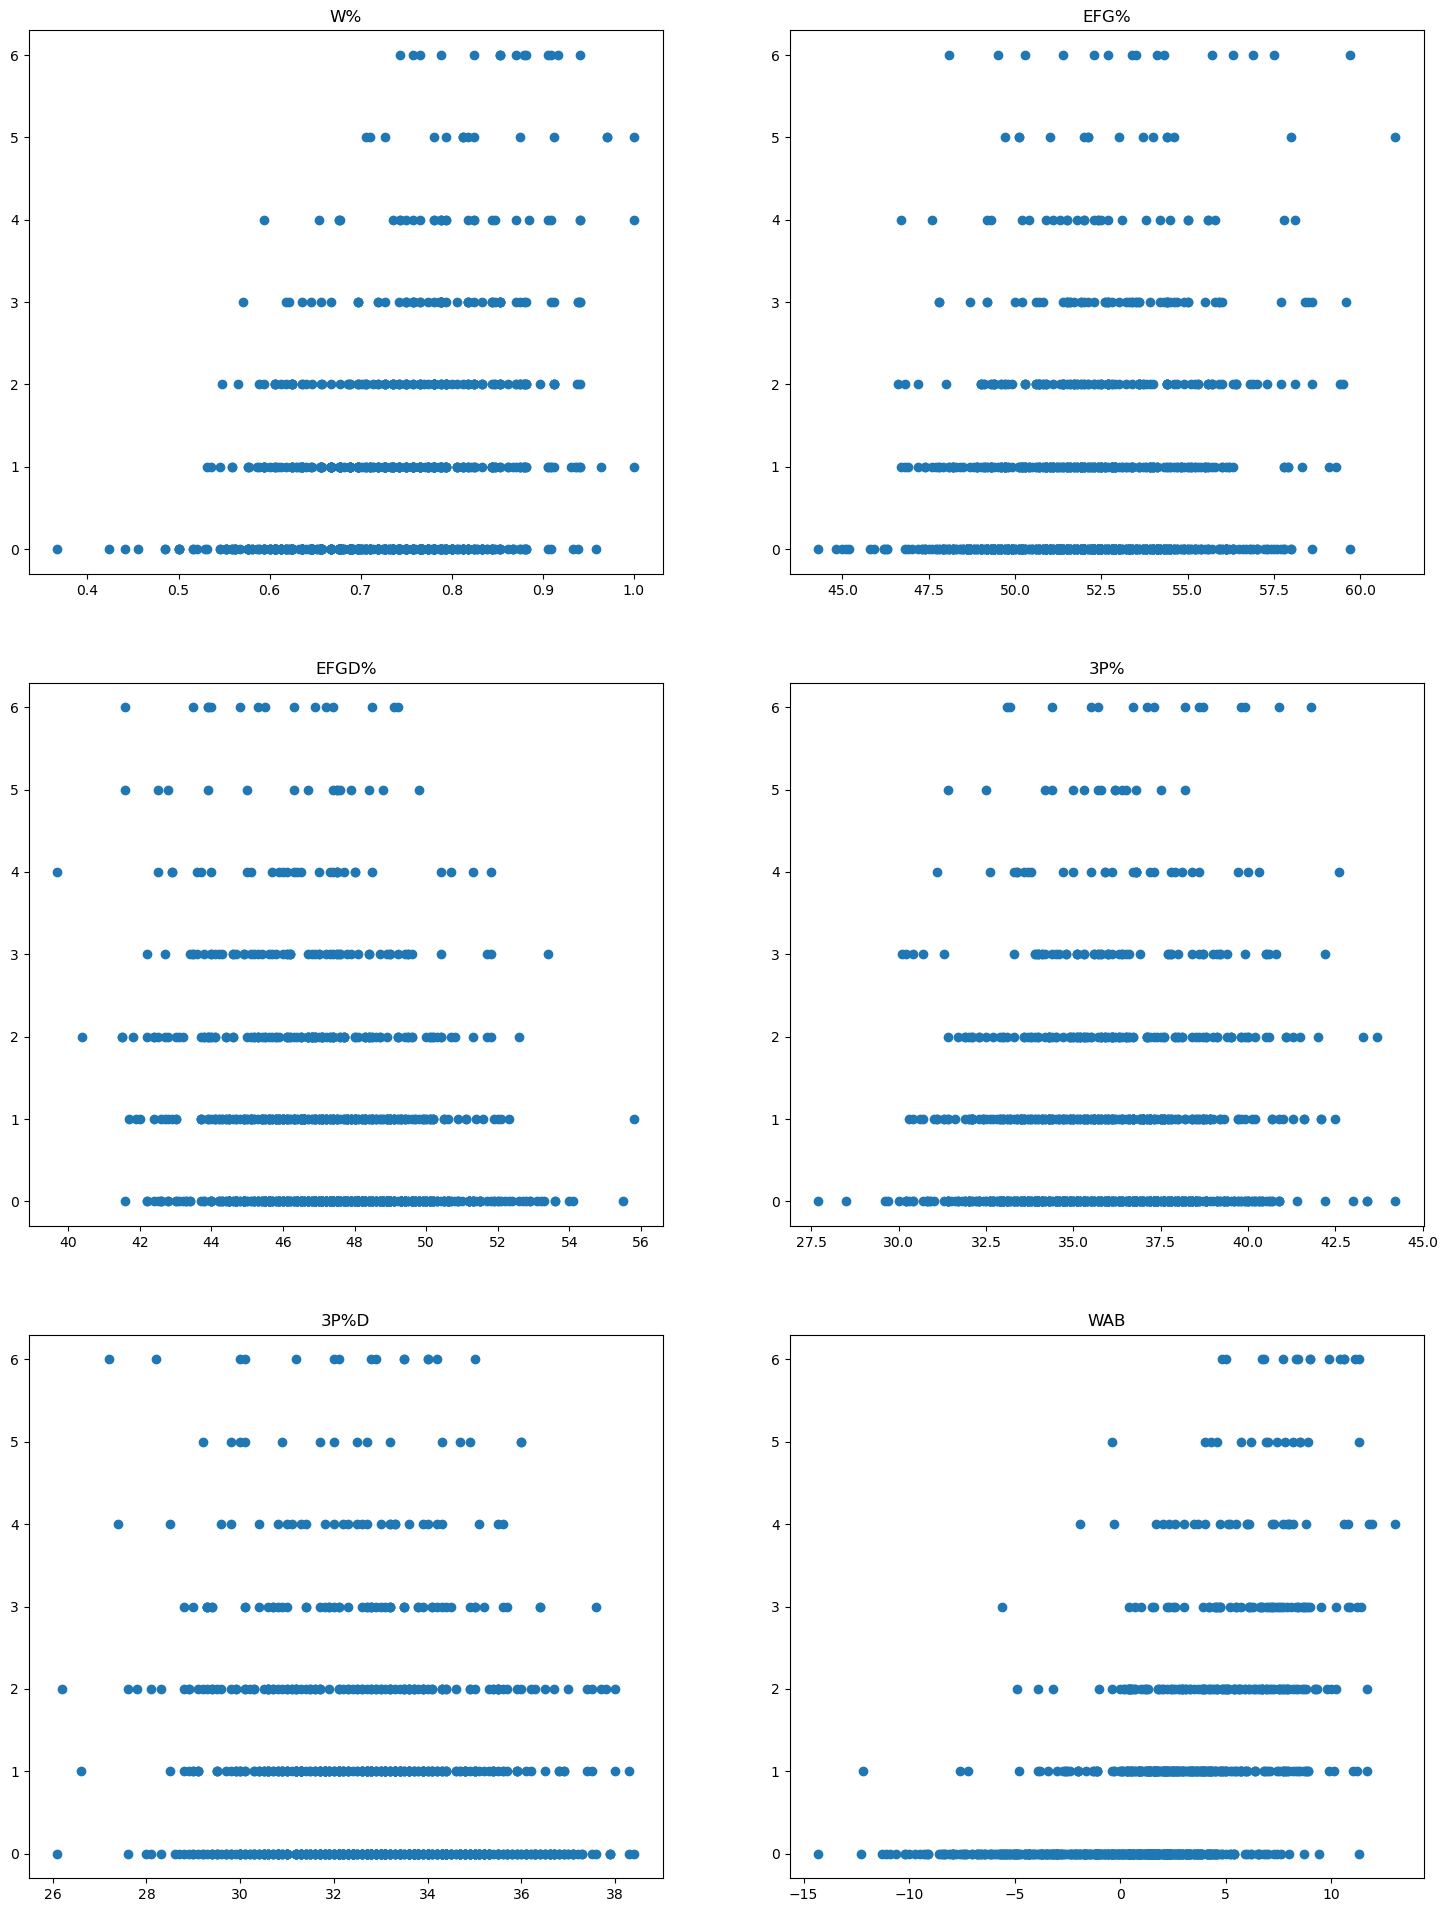

In [39]:
plt.figure(figsize=(18, 24))

plt.subplot(3, 2, 1)
plt.scatter(cbb['W%'],cbb.T_WINS)
plt.title('W%')

plt.subplot(3, 2, 2)
plt.scatter(cbb['EFG%'],cbb.T_WINS)
plt.title('EFG%')

plt.subplot(3, 2, 3)
plt.scatter(cbb['EFGD%'],cbb.T_WINS)
plt.title('EFGD%')
#for nr of rooms, could be described by piecewise function potentially
plt.subplot(3, 2, 4)
plt.scatter(cbb['3P%'],cbb.T_WINS)
plt.title('3P%')
#no clear relationship, adding variables that add noise do not help
plt.subplot(3, 2, 5)
plt.scatter(cbb['3P%D'],cbb.T_WINS)
plt.title('3P%D')

plt.subplot(3, 2, 6)
plt.scatter(cbb['WAB'],cbb.T_WINS)
plt.title('WAB');

In [41]:
def boxplot_t_wins(cbb, X):
    t_wins_categories = ['0', '1', '2', '3', '4', '5', '6']
    t_wins_data = [cbb[cbb['T_WINS'] == category][X].dropna() for category in t_wins_categories]

    plt.boxplot(t_wins_data, labels=t_wins_categories)
    plt.title(f'Relationship Between {X} and T_WINS')
    plt.xlabel('T_WINS')
    plt.ylabel(X)
    plt.show()

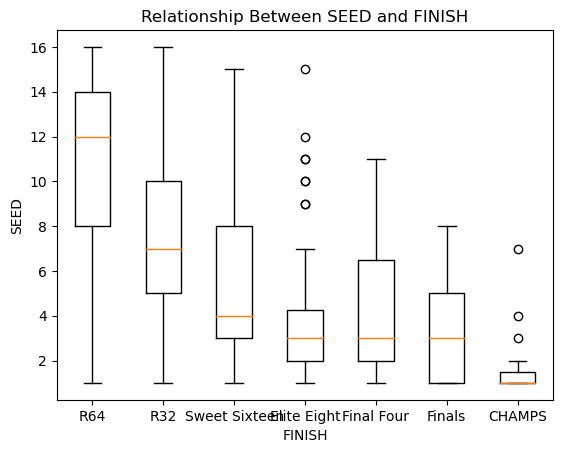

In [62]:
def boxplot_finish(cbb, X):
    # Convert the column to numeric, handling errors and coercing non-numeric values to NaN
    cbb[X] = pd.to_numeric(cbb[X], errors='coerce')

    if cbb[X].notnull().any():
        finish_categories = ['R64', 'R32', 'Sweet Sixteen', 'Elite Eight', 'Final Four', 'Finals', 'CHAMPS']
        finish_data = [cbb[cbb['FINISH'] == category][X].dropna() for category in finish_categories]

        if any(data.notnull().any() for data in finish_data):
            plt.figure(figsize=(12, 6))
            plt.boxplot(finish_data, labels=finish_categories)
            plt.title(f'Relationship Between {X} and FINISH')
            plt.xlabel('FINISH')
            plt.ylabel(X)
            plt.show()
        else:
            print(f"No non-null values found in column '{X}' for any FINISH category.")
    else:
        print(f"No non-null values found in column '{X}'.")

# Example usage
# Assuming cbb is your DataFrame
boxplot_t_wins(cbb, 'SEED')


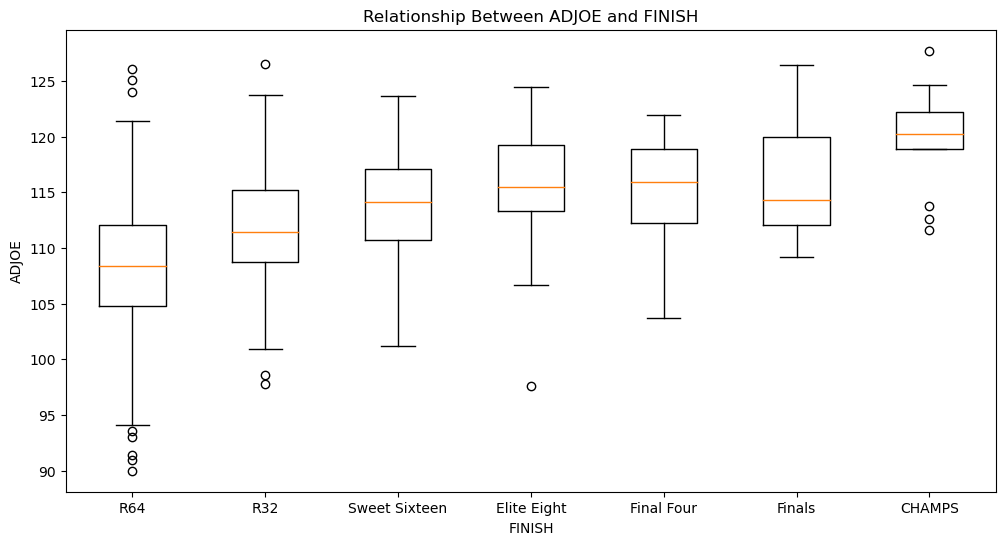

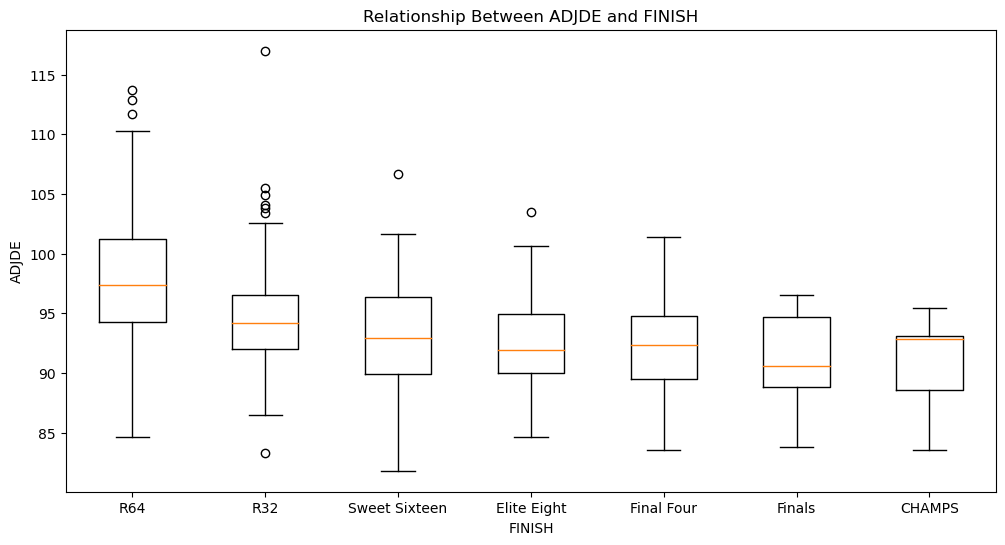

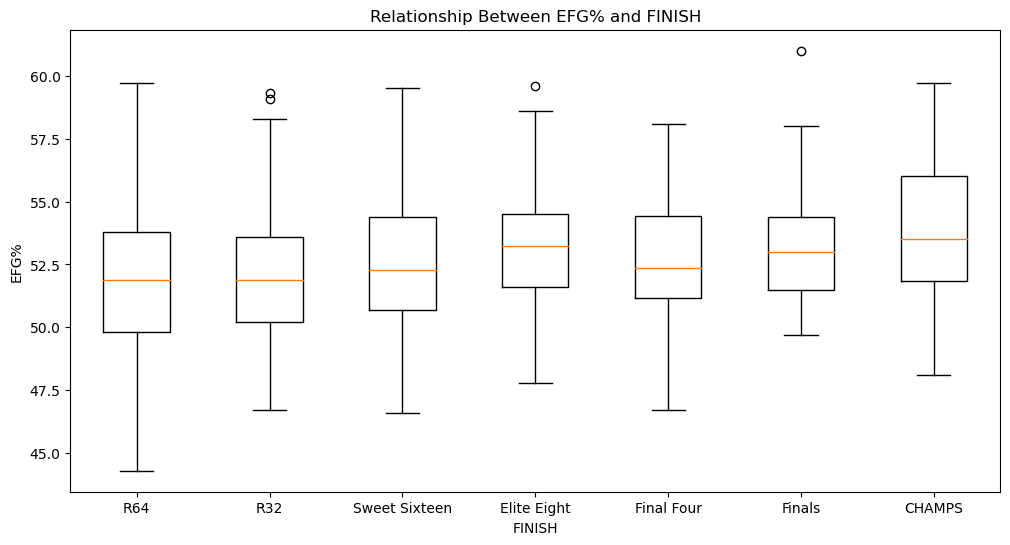

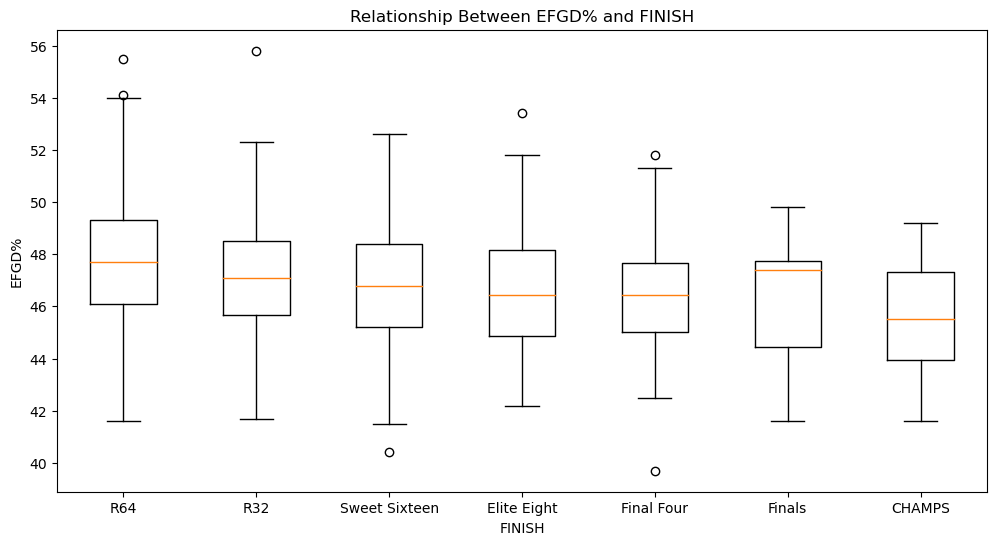

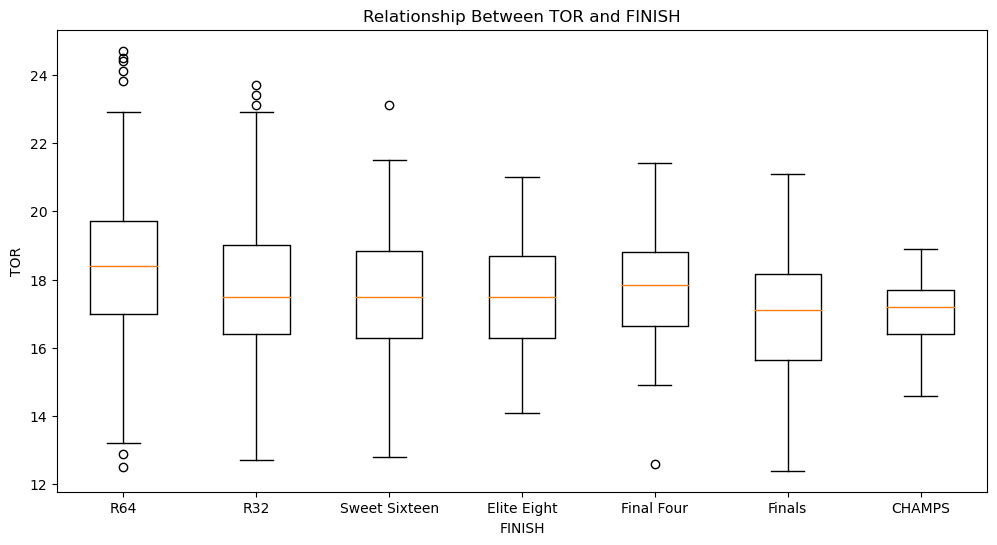

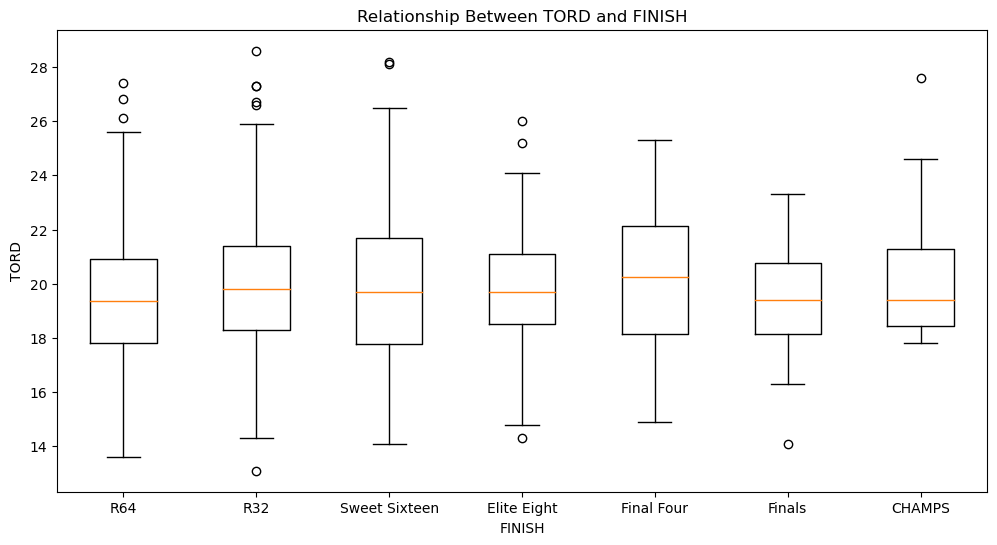

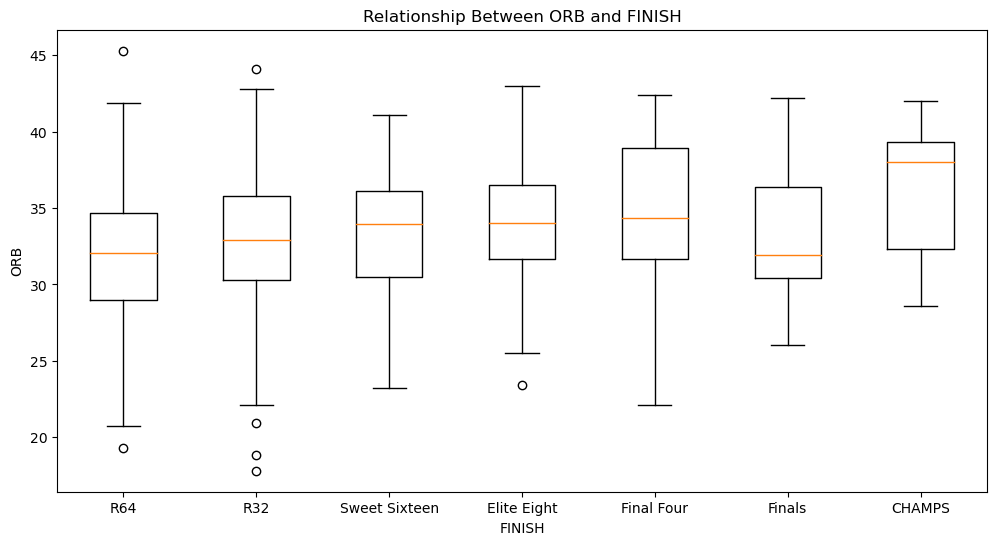

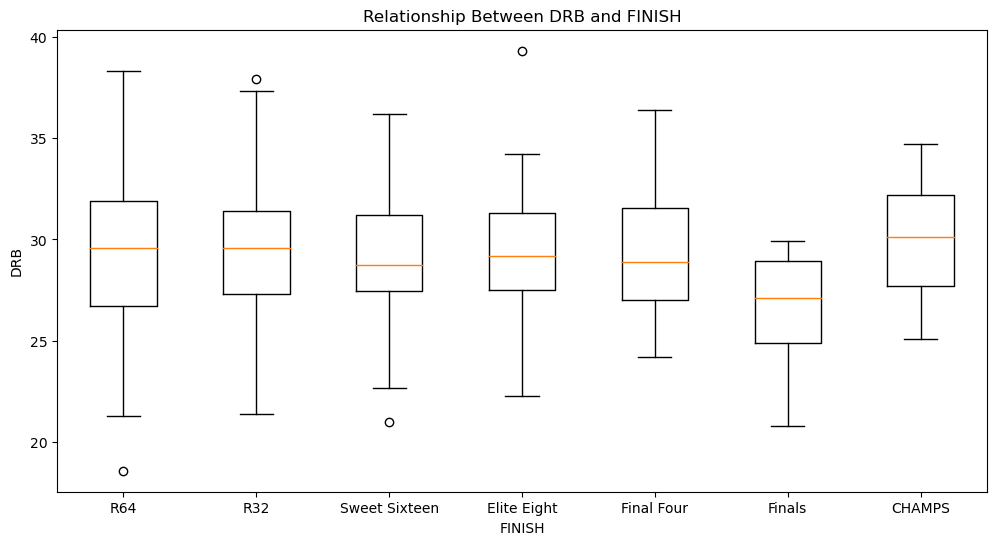

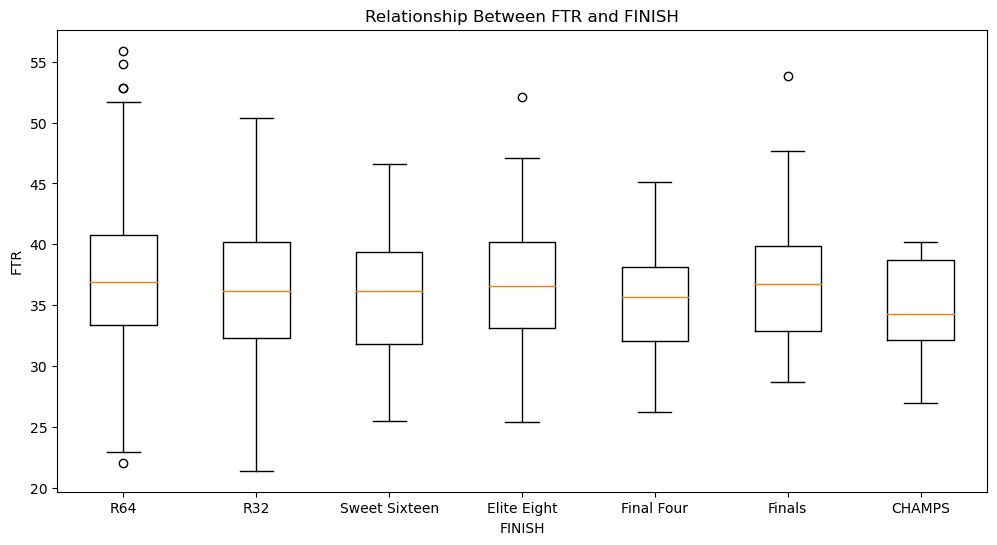

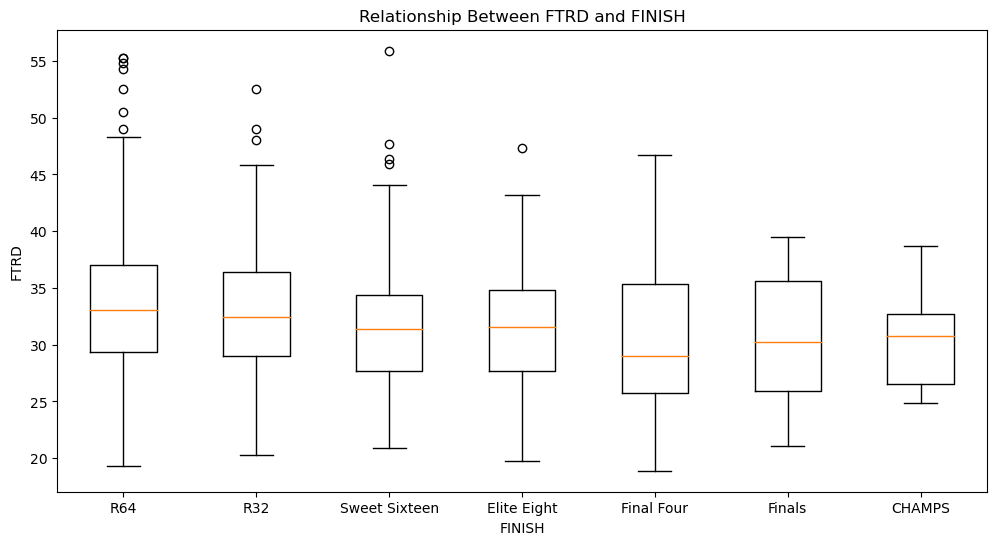

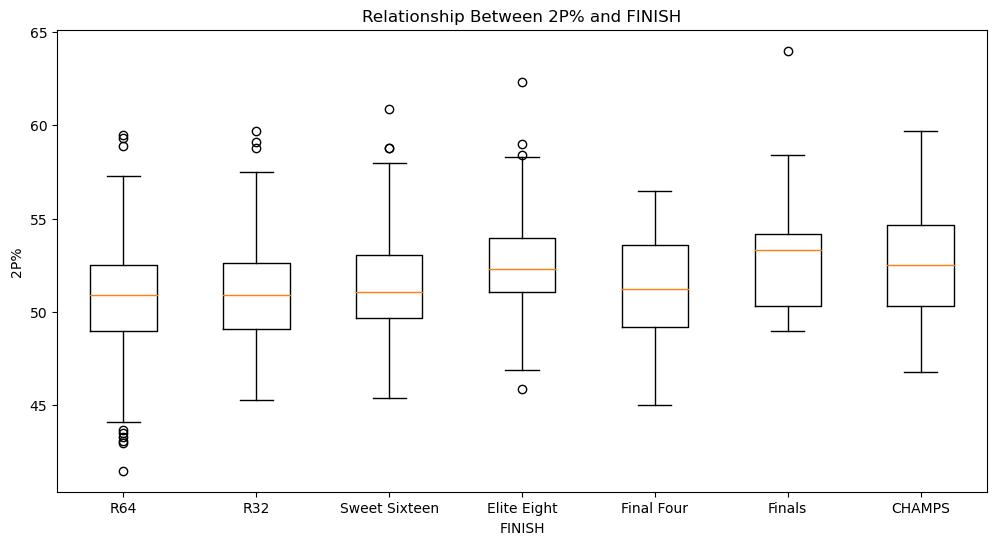

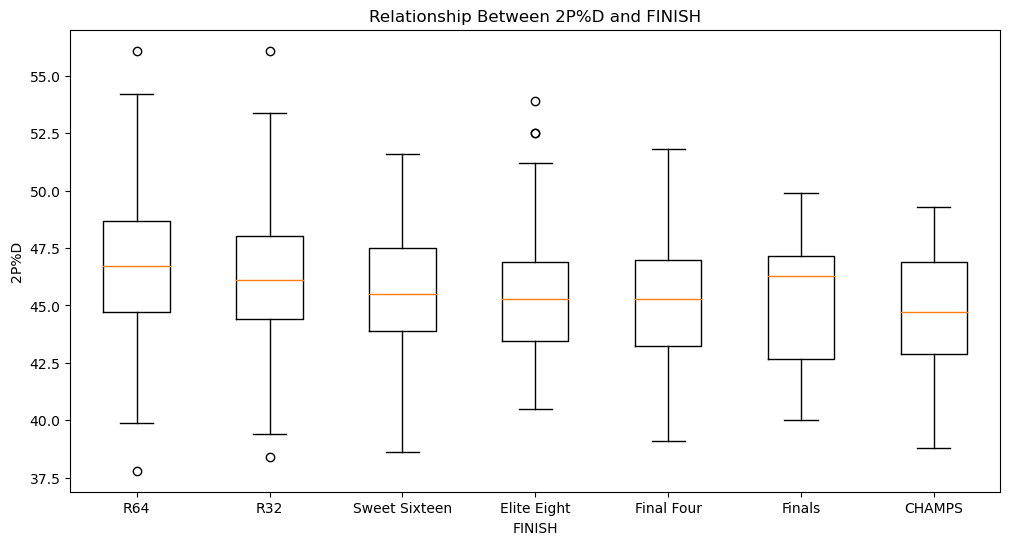

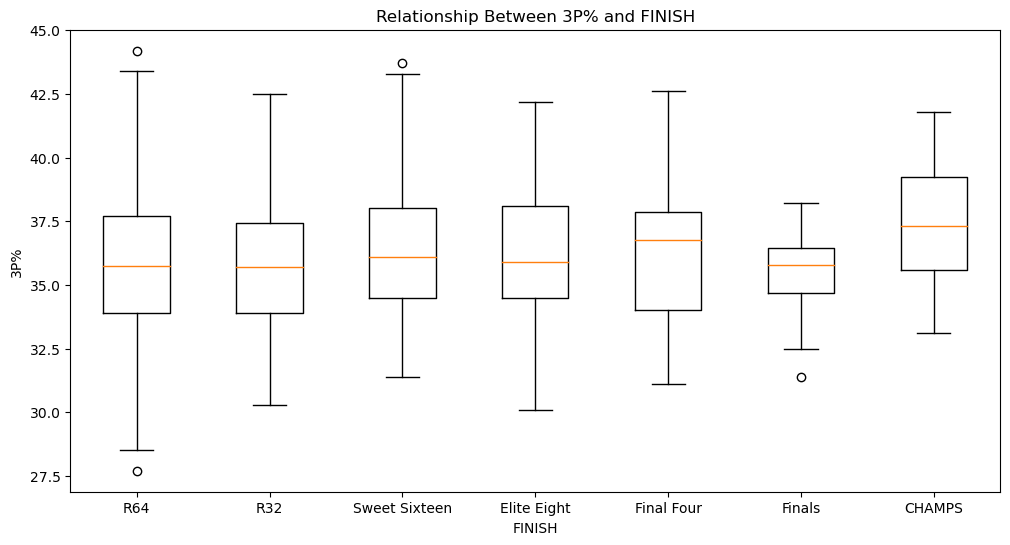

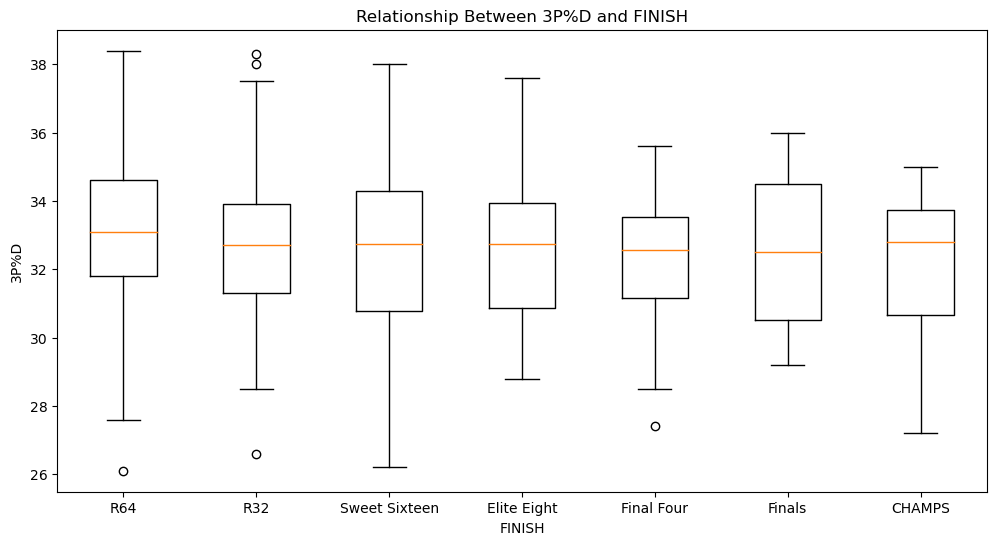

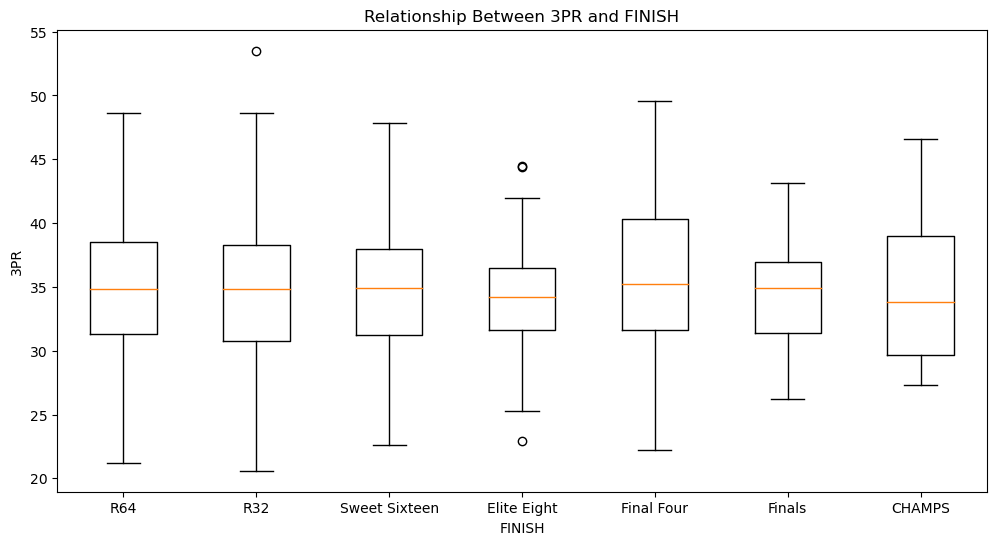

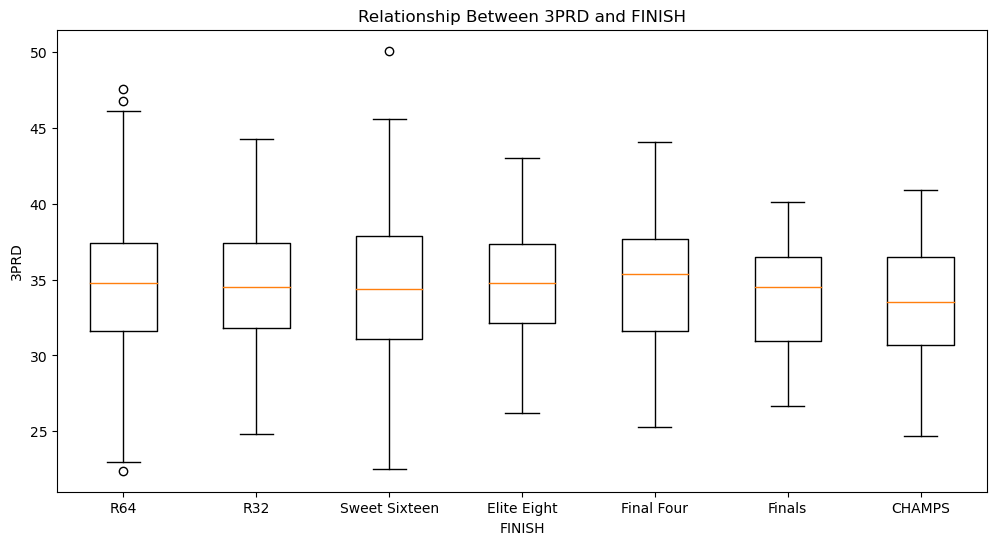

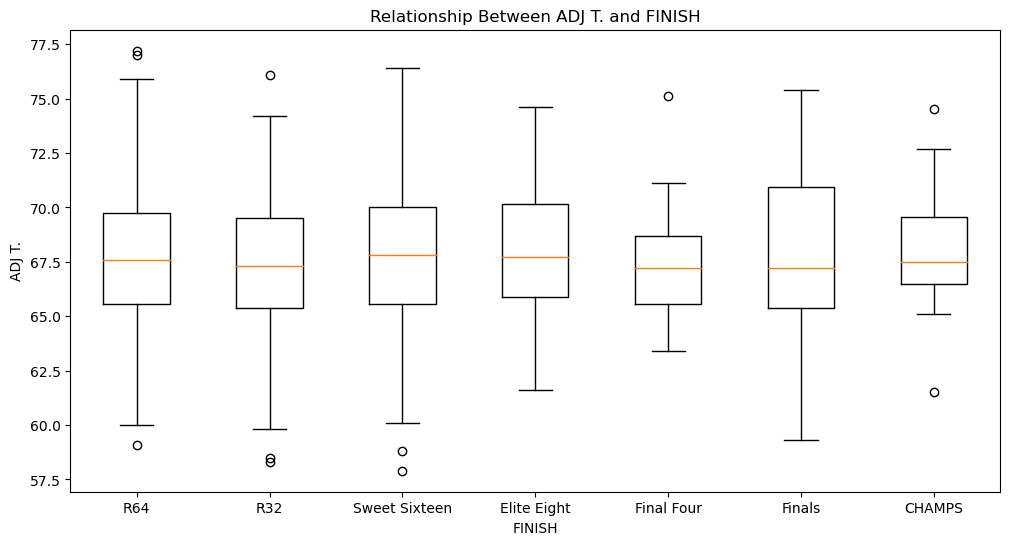

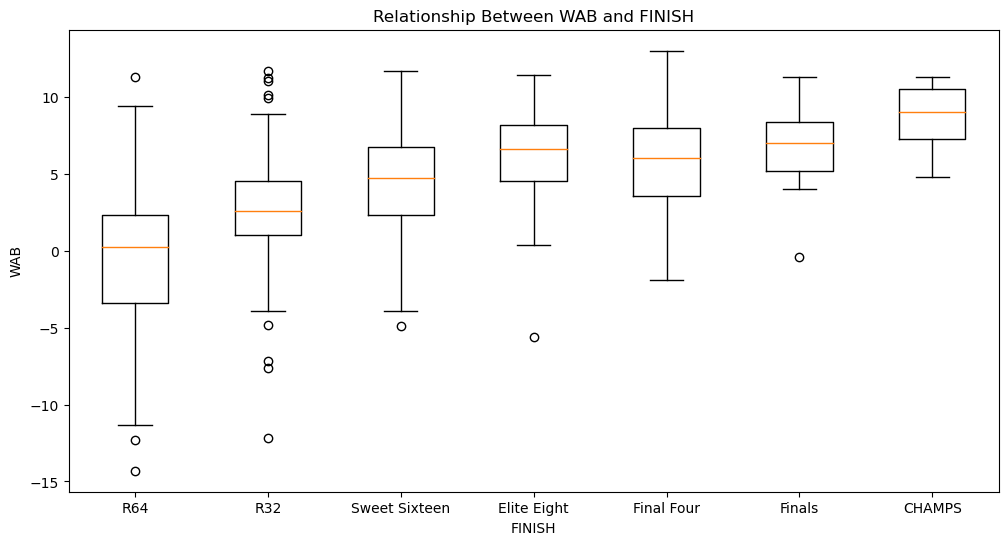

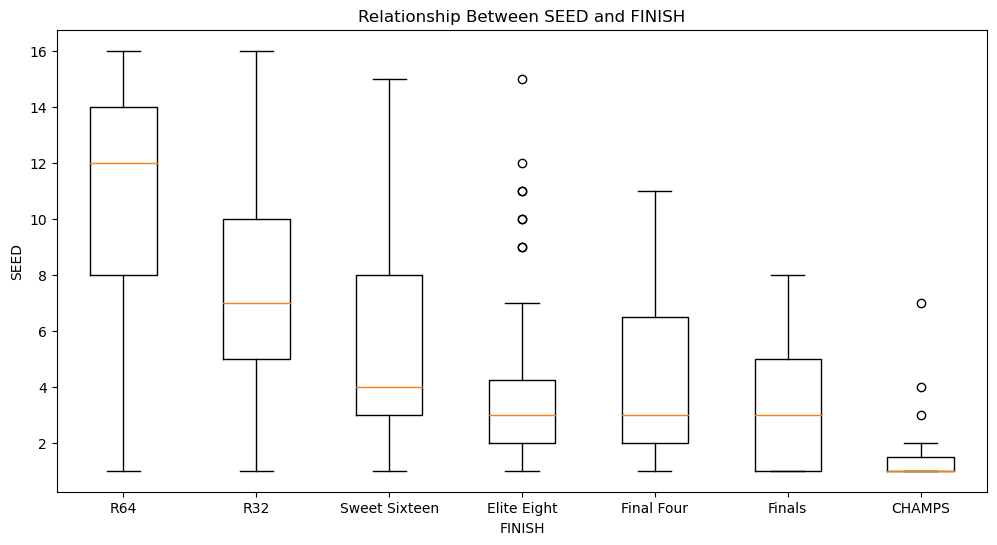

In [63]:
for column in cbb.columns[cbb.columns.get_loc('ADJOE'):cbb.columns.get_loc('SEED') + 1]:
    boxplot_finish(cbb, column)

In [64]:
from scipy.optimize import minimize
random100teams = cbb.sample(n=100)
n=random100teams.shape[0]

predicted1 = np.array([])
    
for i in range(n):
    # drop the i-th row
    tmp_df=random100teams.drop(i)

    # this is residual sum of squares function
    def rss(b):
        estimate = b[0]+b[1]*tmp_df['ADJOE']+b[2]*tmp_df['ADJDE']+b[3]*tmp_df['EFG%']+b[4]*tmp_df['EFGD%']+b[5]*tmp_df['WAB']+b[6]*tmp_df['SEED']
        return (np.mean((tmp_df['T_WINS'] - estimate) ** 2))

    # the estimated values of the parameters
    tmp_fit=minimize(rss,x0=[0,0,0,0,0],method="BFGS").x

    #the predicted weight
    tmp_pred=tmp_fit[0]+tmp_fit[1]*cbb['ADJOE'][i] \
            +tmp_fit[2]*cbb['ADJDE'][i]+tmp_fit[3]*cbb['EFG%'][i]+tmp_fit[4]*cbb['EFGD%'][i]+tmp_fit[5]*cbb['WAB%'][i]+tmp_fit[6]*cbb['SEED%'][i]            
    
    # appending the result
    predicted1 = np.append(predicted1, tmp_pred)

KeyError: '[0] not found in axis'

In [79]:
from scipy.optimize import minimize
import numpy as np

random1000teams = cbb.sample(n=1000)  # Adjust random_state for reproducibility
n = random1000teams.shape[0]

predicted1 = np.array([])

for i in range(n):
    # create a boolean mask to exclude the i-th row
    mask = np.arange(n) != i

    # select rows based on the mask
    tmp_df = random1000teams[mask]

    # this is the residual sum of squares function
    def rss(b):
        estimate = b[0] + b[1] * tmp_df['ADJOE'] + b[2] * tmp_df['ADJDE'] + b[3] * tmp_df['EFG%'] + b[4] * tmp_df['EFGD%'] + b[5] * tmp_df['WAB'] + b[6] * tmp_df['SEED']
        return np.mean((tmp_df['T_WINS'] - estimate) ** 2)

    # the estimated values of the parameters
    tmp_fit = minimize(rss, x0=[0, 0, 0, 0, 0, 0, 0], method="BFGS").x

    # the predicted weight
    tmp_pred = tmp_fit[0] + tmp_fit[1] * random1000teams['ADJOE'].iloc[i] \
            + tmp_fit[2] * random1000teams['ADJDE'].iloc[i] + tmp_fit[3] * random1000teams['EFG%'].iloc[i] \
            + tmp_fit[4] * random1000teams['EFGD%'].iloc[i] + tmp_fit[5] * random1000teams['WAB'].iloc[i] \
            + tmp_fit[6] * random1000teams['SEED'].iloc[i]

    # appending the result
    predicted1 = np.append(predicted1, tmp_pred)

In [81]:
# the mean absolute deviation for the model above
np.mean(abs(random1000teams.T_WINS-predicted1))

0.8285507475084478